CV_Fundamentals class

Original
uint8
(4320, 7680, 3)


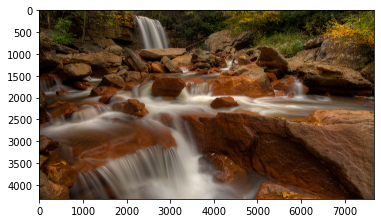

Formula gray scale


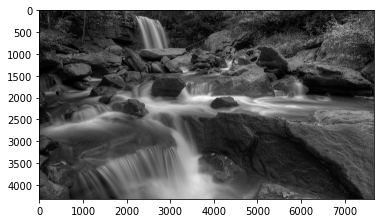

Function gray scale


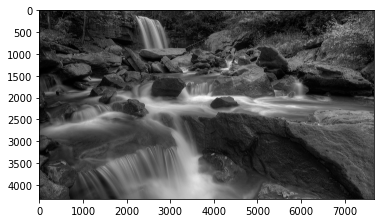

Difference


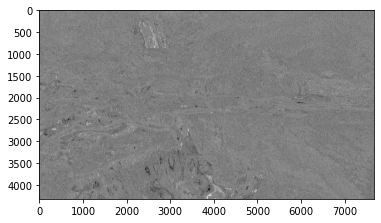

In [0]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import numpy as np, cv2

print("Original")
# load image as pixel array
image = image.imread('01-Ultra HD 8k Wallpapers #05 - persianGFX.com.jpg')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

print("Formula gray scale")
greyOne = image[...,0] * 0.299  + image[...,1] * 0.587 + image[...,2] * 0.114
pyplot.imshow(greyOne, cmap='gray')
pyplot.show()

print("Function gray scale")
image = np.array(image, dtype=np.uint8)
greyTwo = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
pyplot.imshow(greyTwo, cmap='gray')
pyplot.show()

print("Difference")
diff = greyOne - greyTwo
pyplot.imshow(diff, cmap='gray')
pyplot.show()

Original Image


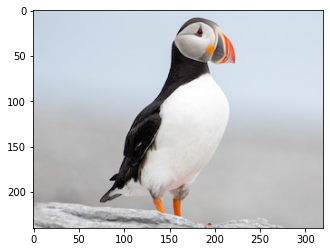

Pepper and salt Image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


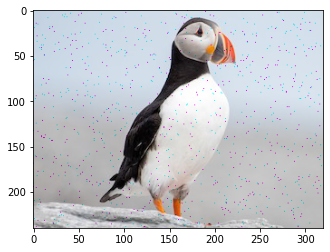

Denoised Image


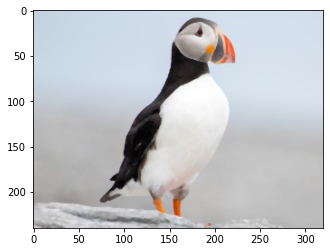

In [0]:
from matplotlib import image
from matplotlib import pyplot
import numpy as np, cv2

def pepperAndSalt(image):
  row,col,ch = image.shape
  s_vs_p = 0.5
  amount = 0.004
  out = np.copy(image)
  # Salt mode
  num_salt = np.ceil(amount * image.size * s_vs_p)
  coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
  out[coords] = 1

  # Pepper mode
  num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
  coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
  out[coords] = 0
  return out

print('Original Image')
image = image.imread('puffin.jpg')
pyplot.imshow(image)
pyplot.show()

print('Pepper and salt Image')
image = pepperAndSalt(image)
pyplot.imshow(image)
pyplot.show()

print('Denoised Image')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.medianBlur(image, 3)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pyplot.imshow(image)
pyplot.show()